In [15]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.io import imread, imshow, show

In [38]:
plt.figure(figsize=(40,30))
plt.gray() # show the filtered result in grayscale

<Figure size 4000x3000 with 0 Axes>

In [53]:
#读取lena的图像，并转换成黑白图像
#im = np.mean(imread('../LLIE/images/lena.jpg'), axis=2)
im = rgb2gray(imread('../LLIE/images/lena.jpg'))

#高斯核
kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))

In [54]:
freq = fp.fft2(im)
assert(freq.shape == kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved = freq*freq_kernel
im1 = fp.ifft2(convolved).real
im1 = 255 * im1 / np.max(im1)
#im1 = np.clip(fp.ifft2(convolved).real, 0, 255).astype(np.uint8)
print(np.max(im1))
#im1 = signal.fftconvolve(im, kernel, mode='same')  # output blurred image

255.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\2286927766.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\2286927766.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14560\2286927766.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))


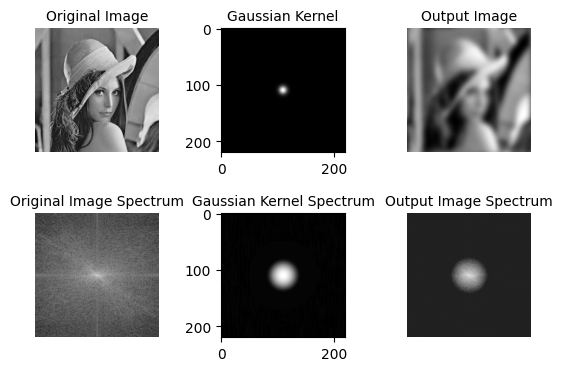

In [55]:
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=10)
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(kernel)
plt.title('Gaussian Kernel', size=10)
plt.subplot(2,3,3)
plt.imshow(im1) # the imaginary part is an artifact
plt.title('Output Image', size=10)
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
plt.title('Original Image Spectrum', size=10)
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
plt.title('Gaussian Kernel Spectrum', size=10)
plt.subplot(2,3,6)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
plt.title('Original Image Spectrum', size=10)
plt.title('Output Image Spectrum', size=10)
plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=0)
plt.show()